# Importing packages

In [1]:
import yfinance as yf
import numpy as np
import scipy as sp
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss, acf, acovf, pacf


from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.tools.eval_measures import rmse, meanabs

import seaborn as sns
from statsmodels.stats.diagnostic import het_arch
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Importing the dataset from yahoo finance

In [2]:
data = yf.download("^IXIC", start="2024-01-01", end="2025-12-31",multi_level_index=False)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,14765.940430,14887.799805,14682.379883,14873.700195,5791170000
2024-01-03,14592.209961,14694.580078,14577.440430,14641.469727,5449950000
2024-01-04,14510.299805,14632.769531,14504.780273,14532.230469,5289220000
2024-01-05,14524.070312,14625.190430,14477.570312,14500.110352,5232820000
2024-01-08,14843.769531,14846.900391,14560.200195,14564.469727,6337770000


In [4]:
data.shape

(284, 5)

In [5]:
NSDQ = data[['Close']]

In [6]:
NSDQ.head()

,Close
Date,
2024-01-02,14765.940430
2024-01-03,14592.209961
2024-01-04,14510.299805
2024-01-05,14524.070312
2024-01-08,14843.769531


# Graph of the dataset

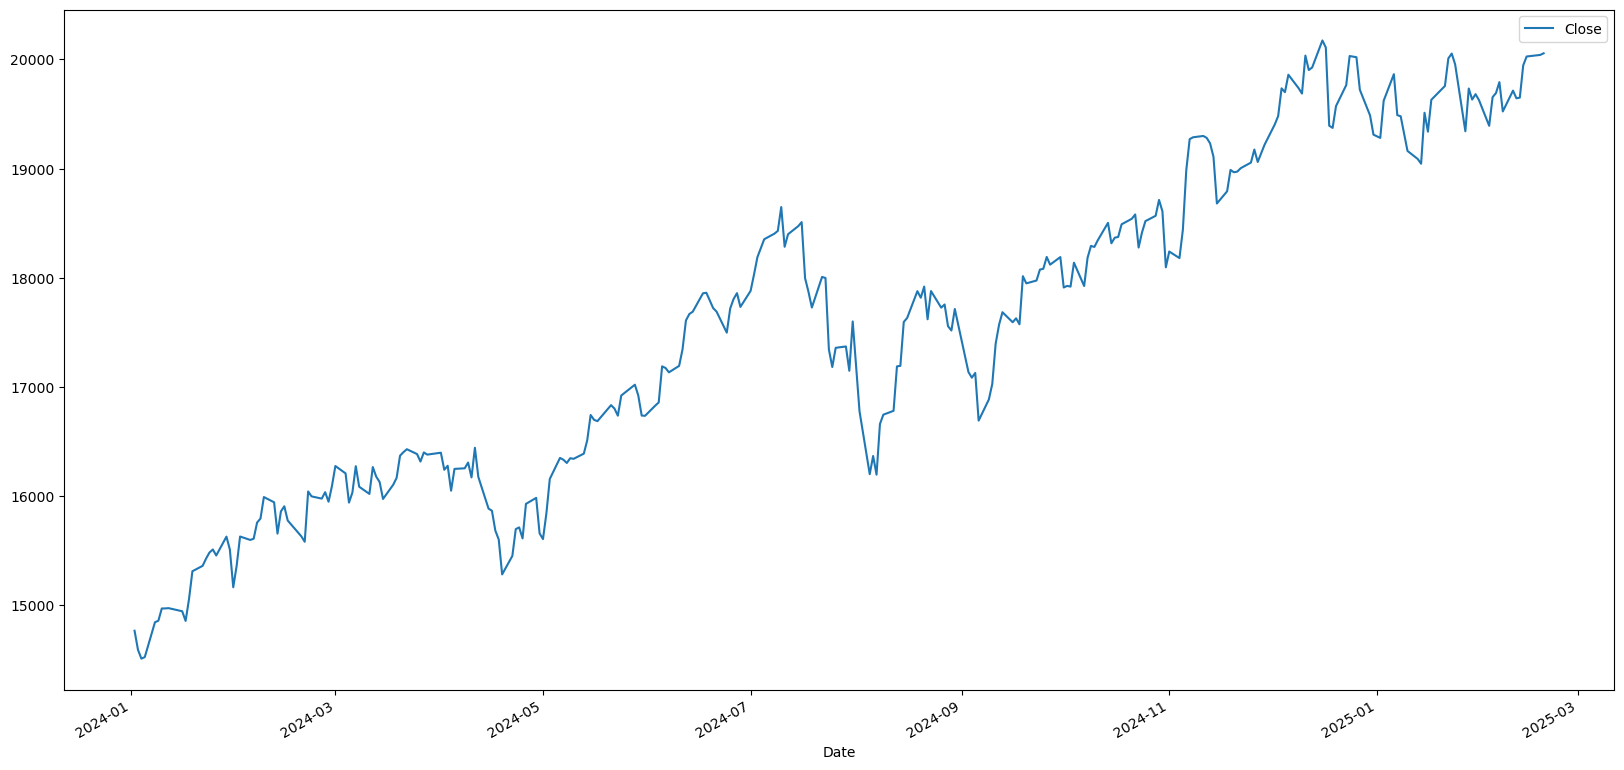

In [7]:
plt.rcParams['figure.figsize'] = (20,10)
NSDQ.plot()
plt.show()

# Plotting the autocorrelation function 

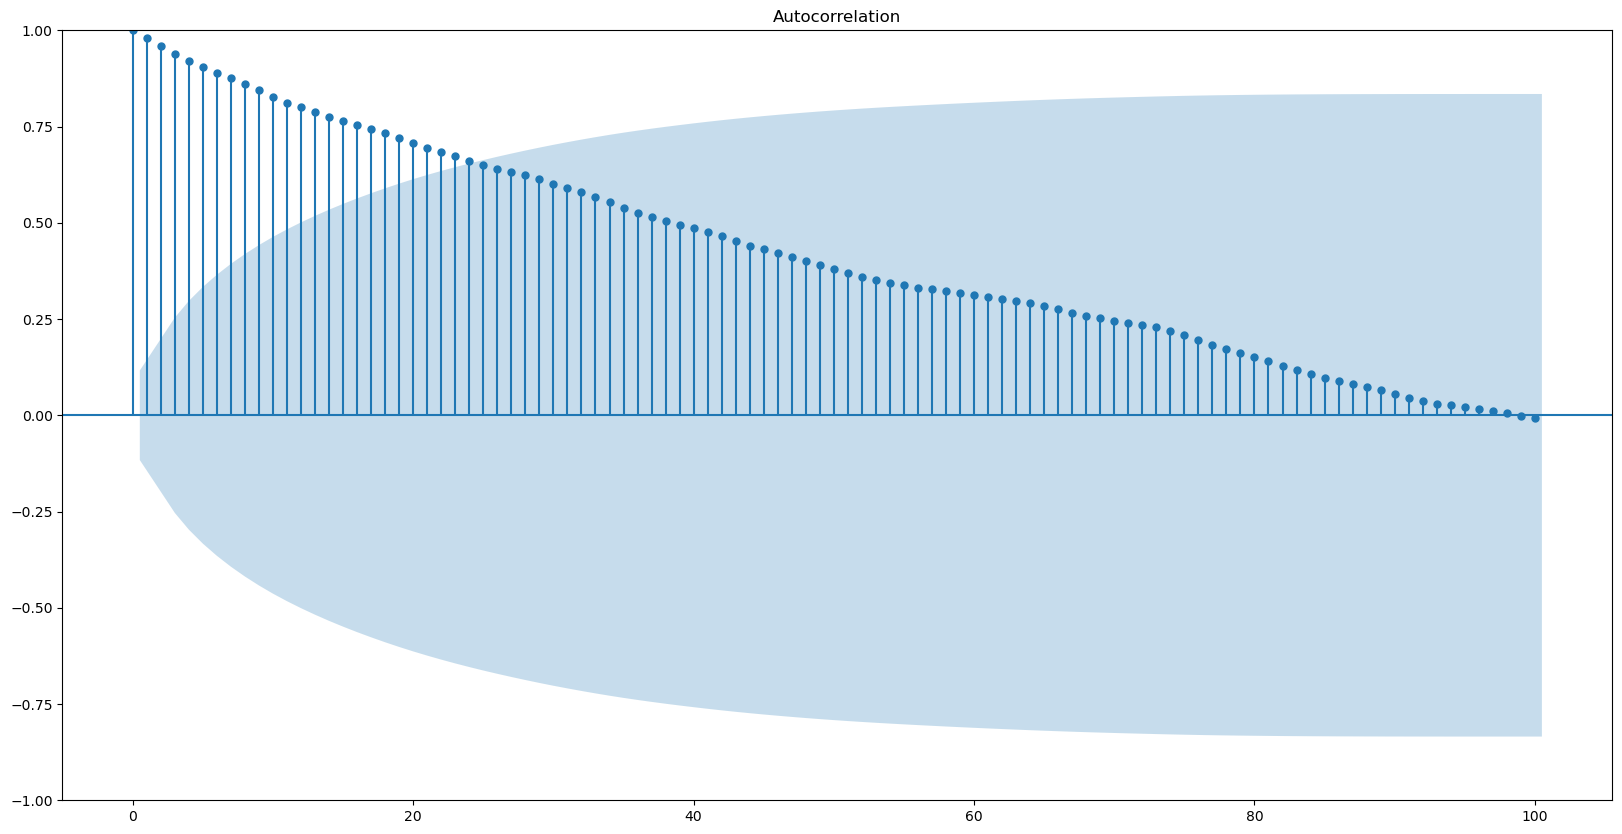

In [8]:
plt.rcParams['figure.figsize'] = (20,10)

    # Dans lags on  met chiffre de sorte a le moment où l'autocorrelation s'annule

plot_acf(NSDQ, lags=100)

    # Affichage du graphique

plt.show()

# Plotting the partial autocorrelation function 

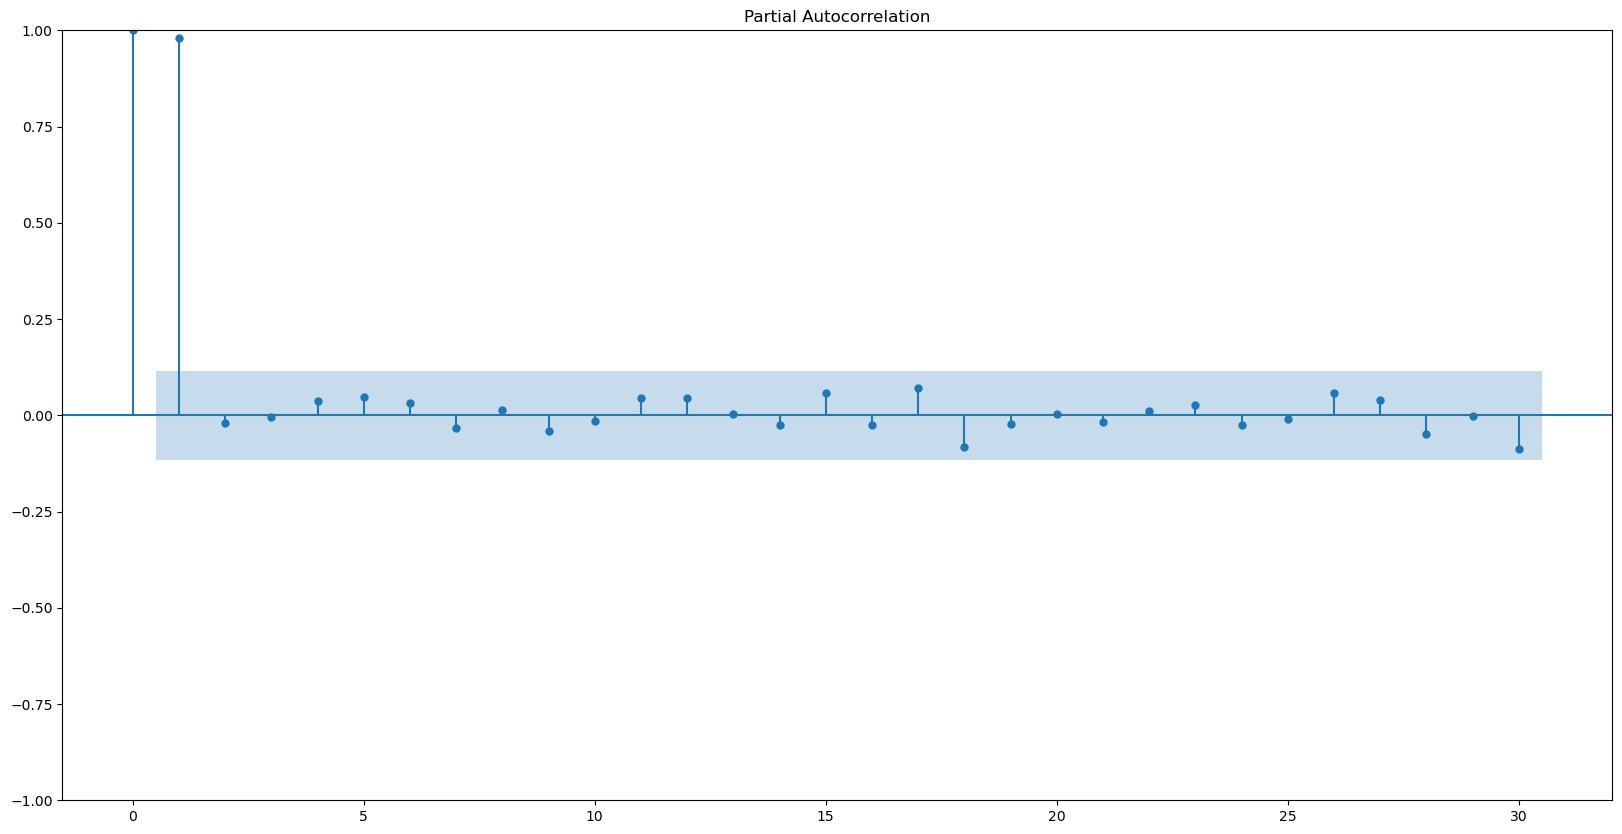

In [9]:
plt.rcParams['figure.figsize'] = (20,10)

plot_pacf(NSDQ, lags=30)
plt.show()

# Augmented Dickey Fuller test
    
   - $H_0$ : la série est non-stationnaire, c a d qu'elle contient au moins une racine unitaire
   - $H_1$ : la série est stationnaire, c a d qu'elle ne comporte pas de racine unitaire

Ainsi, contrairement aux règles de décisions habituelles pour les tests bilatéraux, la règle est inversée :

   - $stat_{test} < stat_{table}$ on ne rejette pas $H_0$ : la tendance/constante n'est pas significativement différente de 0 (non-stationnaire)
    
   - $stat_{test} > stat_{table}$ on rejette $H_0$: la tendance/constante est pas significativement différente de 0 (stationnaire)

- Valeurs critiques de la constante et de la tendance dans le test de Dickey-Fuller

<table>
    <col width="50">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <tr>
        <td colspan="1" style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black"><i>Modèle [2]</i></td>
        <td colspan="6" style="text-align: center;border-right: 2px solid black"><i>Modèle [3]</i></td>
    </tr>
    <tr>
        <td colspan="1" style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Constante</td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Constante</td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Trend</td>
    </tr>
    <tr style="text-align: center;border-bottom: 2px solid black">
        <td style="text-align: center;border-right: 2px solid black">T</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">100</td>
        <td style="text-align: center;border-right: 2px dotted black">3.22</td>
        <td style="text-align: center;border-right: 2px dotted black">2.54</td>
        <td style="text-align: center;border-right: 2px solid black">2.17</td>
        <td style="text-align: center;border-right: 2px dotted black">3.78</td>
        <td style="text-align: center;border-right: 2px dotted black">3.11</td>
        <td style="text-align: center;border-right: 2px solid black">2.73</td>
        <td style="text-align: center;border-right: 2px dotted black">3.53</td>
        <td style="text-align: center;border-right: 2px dotted black">2.79</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">250</td>
        <td style="text-align: center;border-right: 2px dotted black">3.19</td>
        <td style="text-align: center;border-right: 2px dotted black">2.53</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.74</td>
        <td style="text-align: center;border-right: 2px dotted black">3.09</td>
        <td style="text-align: center;border-right: 2px solid black">2.73</td>
        <td style="text-align: center;border-right: 2px dotted black">3.49</td>
        <td style="text-align: center;border-right: 2px dotted black">2.79</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">500</td>
        <td style="text-align: center;border-right: 2px dotted black">3.18</td>
        <td style="text-align: center;border-right: 2px dotted black">2.52</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.08</td>
        <td style="text-align: center;border-right: 2px solid black">2.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.48</td>
        <td style="text-align: center;border-right: 2px dotted black">2.78</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">$\infty$</td>
        <td style="text-align: center;border-right: 2px dotted black">3.18</td>
        <td style="text-align: center;border-right: 2px dotted black">2.52</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.71</td>
        <td style="text-align: center;border-right: 2px dotted black">3.08</td>
        <td style="text-align: center;border-right: 2px solid black">2.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.46</td>
        <td style="text-align: center;border-right: 2px dotted black">2.78</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
</table>
</span>

In [10]:
    # Modèle constante & tendance 'ct'
adf1 = adfuller(NSDQ, regression='ct', autolag='AIC', regresults=True)

    # Affichage des résultats
    
adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     6.710
Date:                Thu, 20 Feb 2025   Prob (F-statistic):            0.00142
Time:                        14:53:11   Log-Likelihood:                -1895.4
No. Observations:                 283   AIC:                             3797.
Df Residuals:                     280   BIC:                             3808.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0907      0.025     -3.662      0.000      -0.139      -0.042
const       1386.4308    373.656      3.710      0.000     650.898    2121.963
x2             1.5535      0.452      3.437      0.001       0.664       2.443
==============================================================================
Omnibus:                       27.723   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.496
Skew:                          -0.676   Prob(JB):                     7.21e-09
Kurtosis:                       4.164   Cond. No.                     5.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
    # Modèle constante 'c'
    
adf1 = adfuller(NSDQ, regression='c', autolag='AIC', regresults=True)

    # Affichage des résultats

adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.547
Date:                Thu, 20 Feb 2025   Prob (F-statistic):              0.215
Time:                        14:53:12   Log-Likelihood:                -1901.3
No. Observations:                 283   AIC:                             3807.
Df Residuals:                     281   BIC:                             3814.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0100      0.008     -1.244      0.215      -0.026       0.006
const        193.1683    140.807      1.372      0.171     -84.001     470.338
==============================================================================
Omnibus:                       21.360   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.955
Skew:                          -0.543   Prob(JB):                     5.16e-07
Kurtosis:                       4.130   Cond. No.                     2.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
    # Modèle sans constante ni tendance 'n'

adf1 = adfuller(NSDQ, regression='n', autolag='AIC', regresults=True)

    # Affichage des résultats

adf1

(1.451898637428468,
 0.9634107290260212,
 {'1%': -2.5736856404749715,
  '5%': -1.9419897547900222,
  '10%': -1.6159142523262657},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1d55647f680>)

In [13]:
NSDQ = np.log(NSDQ[['Close']]/NSDQ[['Close']].shift(1))*100

In [14]:
LNSDQ =NSDQ.dropna()

In [15]:
    # Modèle constante & tendance 'ct'
adf1 = adfuller(LNSDQ, regression='ct', autolag='AIC', regresults=True)

    # Affichage des résultats
    
adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     146.2
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           3.77e-44
Time:                        14:53:12   Log-Likelihood:                -437.15
No. Observations:                 282   AIC:                             880.3
Df Residuals:                     279   BIC:                             891.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0209      0.060    -17.097      0.000      -1.138      -0.903
const          0.1598      0.137      1.165      0.245      -0.110       0.430
x2            -0.0003      0.001     -0.377      0.707      -0.002       0.001
==============================================================================
Omnibus:                       20.048   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.088
Skew:                          -0.534   Prob(JB):                     2.16e-06
Kurtosis:                       4.040   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
    # Modèle constante 'c'
    
adf1 = adfuller(LNSDQ, regression='c', autolag='AIC', regresults=True)

    # Affichage des résultats

adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     293.1
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           1.88e-45
Time:                        14:53:12   Log-Likelihood:                -437.23
No. Observations:                 282   AIC:                             878.5
Df Residuals:                     280   BIC:                             885.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0205      0.060    -17.120      0.000      -1.138      -0.903
const          0.1150      0.068      1.680      0.094      -0.020       0.250
==============================================================================
Omnibus:                       20.541   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.972
Skew:                          -0.540   Prob(JB):                     1.39e-06
Kurtosis:                       4.062   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
    # Modèle sans constante ni tendance 'n'

adf1 = adfuller(LNSDQ, regression='n', autolag='AIC', regresults=True)

    # Affichage des résultats

adf1

(-16.98209584044204,
 1.627313215286078e-28,
 {'1%': -2.5737139776671194,
  '5%': -1.9419934042571028,
  '10%': -1.6159111530699861},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1d55623e570>)

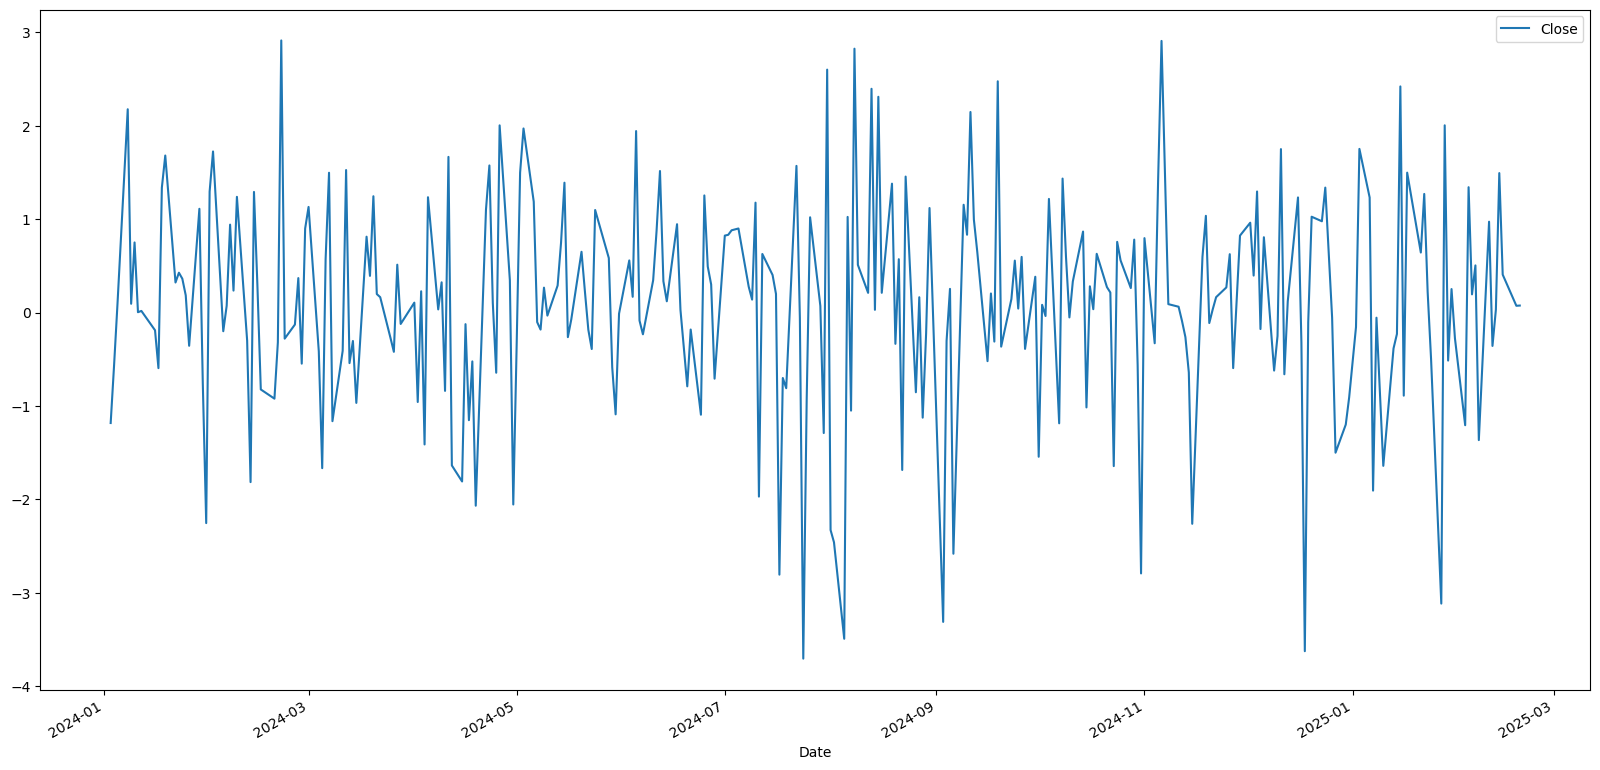

In [18]:
plt.rcParams['figure.figsize'] = (20,10)
LNSDQ.plot()
plt.show()

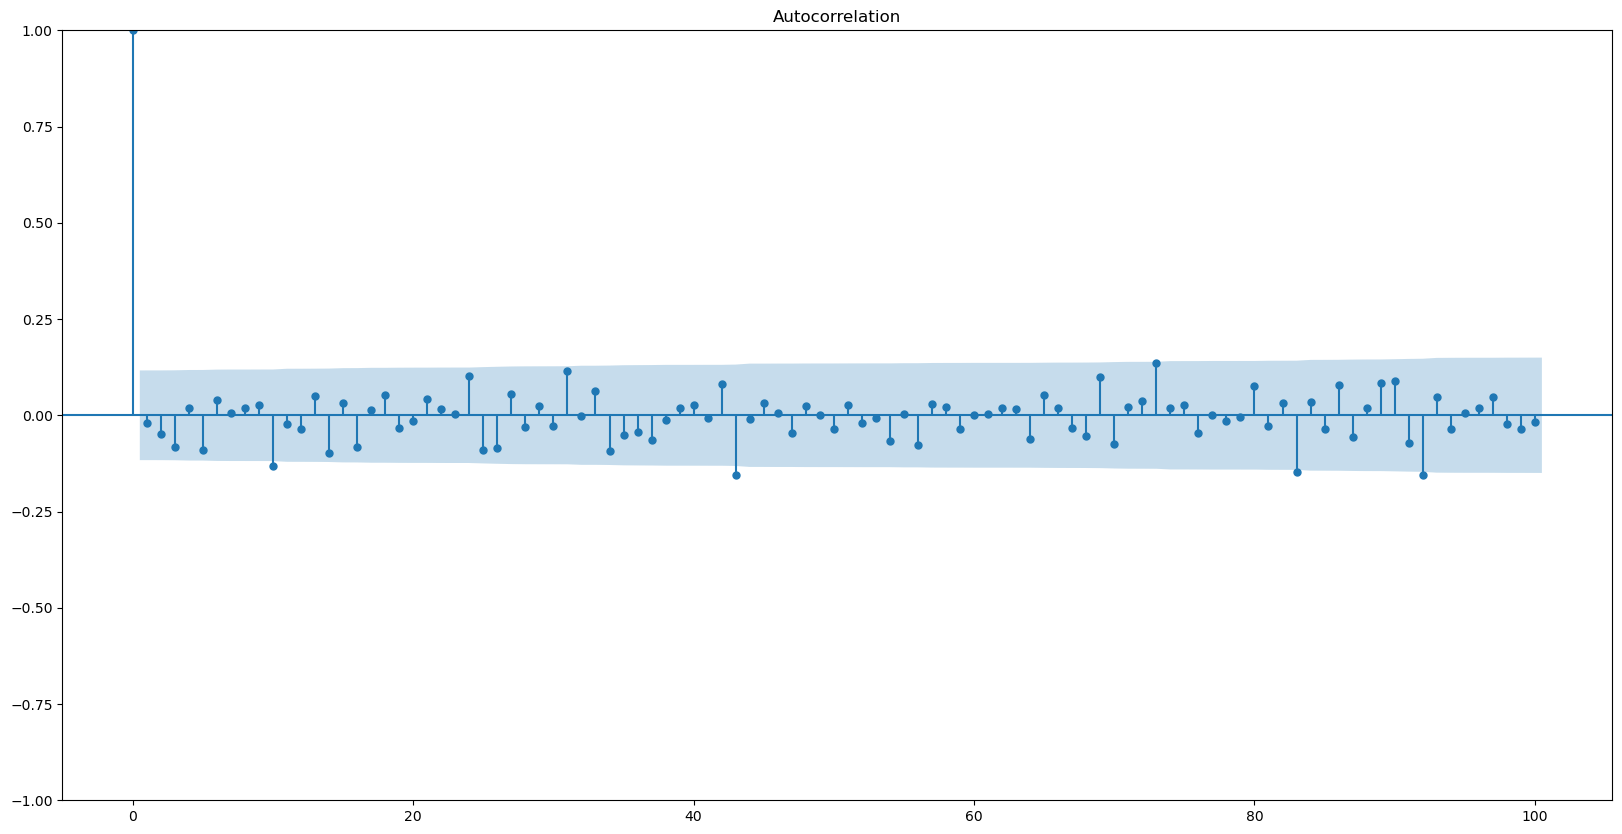

In [19]:
plt.rcParams['figure.figsize'] = (20,10)

    # Dans lags on  met chiffre de sorte a le moment où l'autocorrelation s'annule

plot_acf(LNSDQ, lags=100)

    # Affichage du graphique

plt.show()

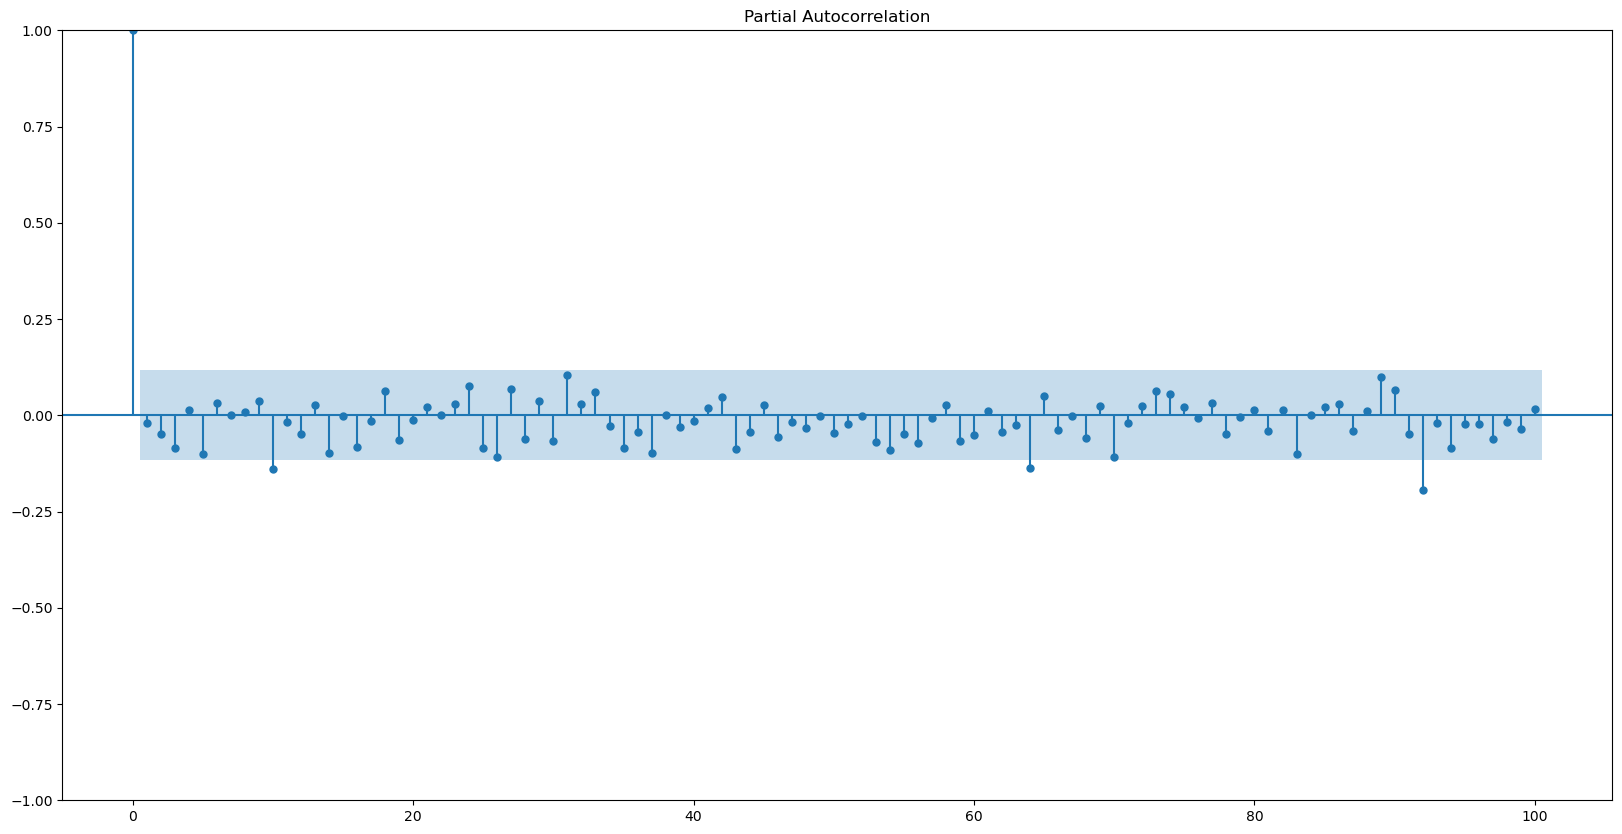

In [20]:
plt.rcParams['figure.figsize'] = (20,10)

    # Dans lags on  met chiffre de sorte a le moment où l'autocorrelation s'annule

plot_pacf(LNSDQ, lags=100)

    # Affichage du graphique

plt.show()

In [23]:
coef_ac, confid_int = acf(LNSDQ, nlags=10, alpha=.05)
coef_ac

array([ 1.        , -0.02054695, -0.04741588, -0.08352932,  0.02008181,
       -0.09095185,  0.04064789,  0.00633266,  0.01972388,  0.02547839,
       -0.13079642])

In [24]:
for q, element in enumerate(coef_ac):
    if confid_int[q, 0] <= 0 <= confid_int[q, 1]:
        print(q-1)
        break

0
